<a href="https://colab.research.google.com/github/anggito-m/AI_Class_Project/blob/main/AI_Project_Transfer_Learning_IC_DESIGN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sesuaikan Versi Tensorflow

In [ ]:
!pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

## Prepare Dataset

## Mount Google Drive

Folder berisi file-file untuk colab ini dapat ditemukan dalam [link drive](https://drive.google.com/drive/folders/1xOGJ1p7Lo79mhFKYCnH4ezL4qa6euT32?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Unzip Dataset

In [ ]:
!unzip /content/drive/MyDrive/dataset/VoxCeleb.zip -d /content/drive/MyDrive/dataset

Archive:  /content/drive/MyDrive/dataset/VoxCeleb.zip


## Extract Dataset Feature

In [ ]:
import json
import os
import math
import librosa

DATASET_PATH = "/content/drive/MyDrive/dataset/VoxCeleb"
JSON_PATH = r"/content/drive/MyDrive/dataset/VoxCeleb/data.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30  # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from the dataset and saves them into a JSON file along with gender labels and counts.

    :param dataset_path (str): Path to dataset
    :param json_path (str): Path to JSON file used to save MFCCs
    :param num_mfcc (int): Number of coefficients to extract
    :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
    :param hop_length (int): Sliding window for FFT. Measured in # of samples
    :param num_segments (int): Number of segments we want to divide sample tracks into
    :return:
    """

    # dictionary to store mapping, labels, MFCCs, and gender counts
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": [],
        "gender": [],
        "male_count": 0,
        "female_count": 0
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all gender sub-folders
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a gender sub-folder level
        if dirpath is not dataset_path:
            # save gender label (i.e., sub-folder name) in the mapping
            gender_label = dirpath.split("/")[-1]

            if gender_label not in data["mapping"]:
                data["mapping"].append(gender_label)
            print("\nProcessing: {}".format(gender_label))

            # process all audio files in gender sub-dir
            for f in filenames:
                # Load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # Process all segments of audio file
                for d in range(num_segments):
                    # Calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # Extract MFCC
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # Store only MFCC feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i - 1)
                        data["gender"].append(gender_label)
                        if gender_label == "males":
                            data["male_count"] += 1
                        elif gender_label == "females":
                            data["female_count"] += 1
                        print("{}, segment:{}, mapping: {}".format(file_path, d + 1, data["mapping"]))

    # Save MFCCs to JSON file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/dataset/VoxCeleb/females/262.wav, segment:4, mapping: ['females']
/content/drive/MyDrive/dataset/VoxCeleb/females/360.wav, segment:1, mapping: ['females']

Processing: males
/content/drive/MyDrive/dataset/VoxCeleb/males/ 2733.wav, segment:1, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 2734.wav, segment:1, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 2796.wav, segment:1, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 2621.wav, segment:1, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 2621.wav, segment:2, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 2776.wav, segment:1, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 2776.wav, segment:2, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 2806.wav, segment:1

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1235
  warnings.warn(


/content/drive/MyDrive/dataset/VoxCeleb/males/ 1493.wav, segment:2, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 1565.wav, segment:1, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 1565.wav, segment:2, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 1583.wav, segment:1, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 1583.wav, segment:2, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 1547.wav, segment:1, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 1622.wav, segment:1, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 1622.wav, segment:2, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 1549.wav, segment:1, mapping: ['females', 'males']
/content/drive/MyDrive/dataset/VoxCeleb/males/ 1666.wav, segment:1, mapping: ['females', 'males']
/content/drive/MyDri

In [ ]:
import json
import os
import math
import librosa

DATASET_PATH = "/content/drive/MyDrive/dataset/VoxCeleb"
JSON_PATH = r"/content/drive/MyDrive/dataset/VoxCeleb/data.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.

        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            dirpath_comp= dirpath.split("/")
            semantic_label = dirpath_comp[-1] #
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:
                if(f==str("jazz.00054.wav")):
                    # As librosa only read files <1Mb
                    continue
                else:
		# load audio file
                    file_path = os.path.join(dirpath, f)
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                    # process all segments of audio file
                    for d in range(num_segments):

                        # calculate start and finish sample for current segment
                        start = samples_per_segment * d
                        finish = start + samples_per_segment

                        # extract mfcc
                        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T

                        # store only mfcc feature with expected number of vectors
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}, mapping{}".format(file_path, d+1,data["mapping"]))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

## Seeing Dataset for Men and Women

In [ ]:
import json
import numpy as np

DATA_PATH = "/content/drive/MyDrive/dataset/VoxCeleb/data.json"

def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["mapping"])
    return X, y

# Load the data
X, y = load_data(DATA_PATH)

# Count the occurrences of each label
unique, counts = np.unique(y, return_counts=True)
label_counts = dict(zip(unique, counts))

num_men = label_counts.get(0, 0)
num_women = label_counts.get(1, 0)

print(f'Number of men: {num_men}')
print(f'Number of women: {num_women}')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset/VoxCeleb/data.json'

## Load Pretrained Model

In [ ]:
from tensorflow.keras.models import load_model

# Load the entire model
SAVE_PATH="/content/drive/MyDrive/dataset/Pretrained_Model_LSTM.keras"
pretrained_model = load_model(SAVE_PATH)

In [ ]:
pretrained_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 130, 128)            │          72,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 385,256 (1.47 MB)

 Trainable params: 128,418 (501.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 256,838 (1003.28 KB)

## Customize the Pretrained Model

**Freezing Pretrained Model Layers (OPSIONAL)**
Atas berbagai pertimbangan, pada tugas kali ini kita tidak melakukan *freezing* pada layer *pretrained model*

In [ ]:
# Freeze layers in the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False
pretrained_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 130, 128)            │          72,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 385,256 (1.47 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 128,418 (501.63 KB)

 Optimizer params: 256,838 (1003.28 KB)

**Modify top model**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

# Get the output tensor of the last layer in the pretrained model
x = pretrained_model.layers[-2].output

# Add new layers on top
x = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)

# Create a new model with modified top layers
modified_model = Model(inputs= pretrained_model.layers[0].input, outputs=output_layer)
modified_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 130, 13)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 130, 128)            │          72,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,162 (524.07 KB)

 Trainable params: 134,162 (524.07 KB)

 Non-trainable params: 0 (0.00 B)

**Ensure All Layers of the Pretrained Model are Trainable**

In [ ]:
# Make sure the layers are trainable
for layer in modified_model.layers[:]:
    layer.trainable = True

**Seing Layer Data Pada Modified Layer**

In [ ]:
for layer in modified_model.layers[:]:
    print(f"Layer name: {layer.name}, Layer type: {layer.__class__.__name__}, Trainable: {layer.trainable}")
modified_model.summary()

Layer name: input_layer, Layer type: InputLayer, Trainable: True
Layer name: lstm, Layer type: LSTM, Trainable: True
Layer name: lstm_1, Layer type: LSTM, Trainable: True
Layer name: dense, Layer type: Dense, Trainable: True
Layer name: dropout, Layer type: Dropout, Trainable: True
Layer name: dense_1, Layer type: Dense, Trainable: True
Layer name: dense_5, Layer type: Dense, Trainable: True
Layer name: dense_6, Layer type: Dense, Trainable: True
Layer name: dense_7, Layer type: Dense, Trainable: True
Layer name: dense_8, Layer type: Dense, Trainable: True
Layer name: dense_9, Layer type: Dense, Trainable: True


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 130, 13)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 130, 128)            │          72,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,162 (524.07 KB)

 Trainable params: 134,162 (524.07 KB)

 Non-trainable params: 0 (0.00 B)

## Prepare & train dataset

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

**Dataset Path**

In [ ]:
DATA_PATH = "/content/drive/MyDrive/dataset/VoxCeleb/data.json"

**Load Data Function**

In [ ]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

**Function for Plot History of Error and Accuracy**

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    axs[0].set_ylim([0, 1])

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    axs[1].set_ylim([0, 1])

    plt.show()

**Prepare Dataset Function**

In [ ]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test

**Train Modified Model**

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 130, 13)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 130, 128)            │          72,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,162 (524.07 KB)

 Trainable params: 134,162 (524.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.4327 - loss: 0.9827 - val_accuracy: 0.7078 - val_loss: 0.6425
Epoch 2/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6976 - loss: 0.6241 - val_accuracy: 0.8128 - val_loss: 0.4641
Epoch 3/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7955 - loss: 0.4753 - val_accuracy: 0.8326 - val_loss: 0.4171
Epoch 4/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8424 - loss: 0.3905 - val_accuracy: 0.8499 - val_loss: 0.3645
Epoch 5/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8617 - loss: 0.3510 - val_accuracy: 0.8610 - val_loss: 0.3412
Epoch 6/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8766 - loss: 0.3243 - val_accuracy: 0.8808 - val_loss: 0.3148
Epoch 7/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8888 - loss: 0.2998 - val_accuracy: 0.8493 - val_loss: 0.3397
Epoch 8/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8913 - loss: 0.2808 - val_acc

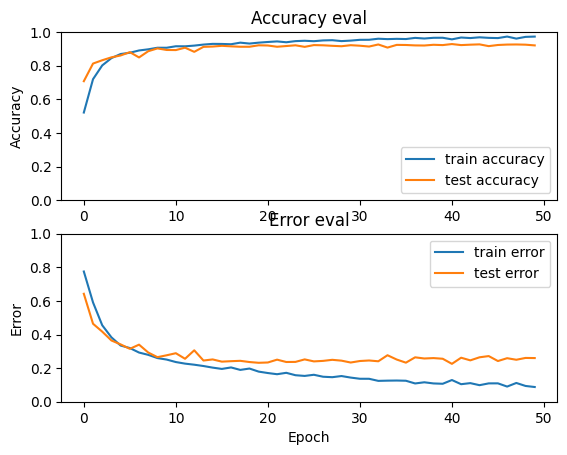

85/85 - 1s - 7ms/step - accuracy: 0.9155 - loss: 0.2908

Test accuracy: 0.9155242443084717


In [ ]:
if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    # input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    # modified_model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    modified_model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    modified_model.summary()

    # train model
    history = modified_model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = modified_model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)


**See Precision for each Men and Women dataset**



In [ ]:
from sklearn.metrics import confusion_matrix, precision_score

y_pred = np.argmax(modified_model.predict(X_test), axis=1)

    # compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["male", "female"])  # Assuming 0 is men and 1 is women

    # extract true positives and false positives for each class
TP_men = cm["male", "male"]
FP_men = cm["female", "male"]
TP_women = cm["female", "female"]
FP_women = cm["male", "female"]

# calculate precision for each class
precision_men = TP_men / (TP_men + FP_men)
precision_women = TP_women / (TP_women + FP_women)

print(f'Precision for men: {precision_men}')
print(f'Precision for women: {precision_women}')

# alternatively, using precision_score from sklearn
precision_men_sklearn = precision_score(y_test, y_pred, pos_label=0)
precision_women_sklearn = precision_score(y_test, y_pred, pos_label=1)

print(f'Precision for men (sklearn): {precision_men_sklearn}')
print(f'Precision for women (sklearn): {precision_women_sklearn}')

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Precision for men: 0.9670530811470409
Precision for women: 0.9433962264150944
Precision for men (sklearn): 0.9670530811470409
Precision for women (sklearn): 0.9433962264150944


**Save The Modified Model**

In [ ]:
SAVE_PATH ="/content/sample_data/model_TL_LATEST1.keras"
modified_model.save(SAVE_PATH)
print("Saved model to disk")

Saved model to disk


In [ ]:
print(f"Test Loss: {test_loss}")

# Predictions on the test set
modified_pred = modified_model.predict(X_test)
print(modified_pred)

Test Loss: 0.20884498953819275
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[0.98162824 0.01837183]
 [0.02099362 0.97900635]
 [0.9657917  0.03420829]
 ...
 [0.9714759  0.02852407]
 [0.01866958 0.98133045]
 [0.01287245 0.98712754]]


In [ ]:
while (True): pass

## Perform T-Test

**Load Original (Pre trained) Model Architecture**

In [ ]:
from tensorflow.keras.models import load_model

# Load the entire model
SAVE_PATH="/content/drive/MyDrive/dataset/Pretrained_Model_LSTM.keras"
original_model = load_model(SAVE_PATH)

**Train Original Model on VoxCeleb Dataset**

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 130, 128)            │          72,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,418 (501.63 KB)

 Trainable params: 128,418 (501.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4313 - loss: 3.7374 - val_accuracy: 0.6041 - val_loss: 0.6622
Epoch 2/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6117 - loss: 0.6536 - val_accuracy: 0.6683 - val_loss: 0.5997
Epoch 3/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7194 - loss: 0.5647 - val_accuracy: 0.8054 - val_loss: 0.4373
Epoch 4/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8167 - loss: 0.4263 - val_accuracy: 0.8413 - val_loss: 0.3927
Epoch 5/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8481 - loss: 0.3760 - val_accuracy: 0.8629 - val_loss: 0.3360
Epoch 6/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8785 - loss: 0.3146 - val_accuracy: 0.8734 - val_loss: 0.2997
Epoch 7/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8922 - loss: 0.2946 - val_accuracy: 0.8771 - val_loss: 0.2949
Epoch 8/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9041 - loss: 0.2653 - val_accu

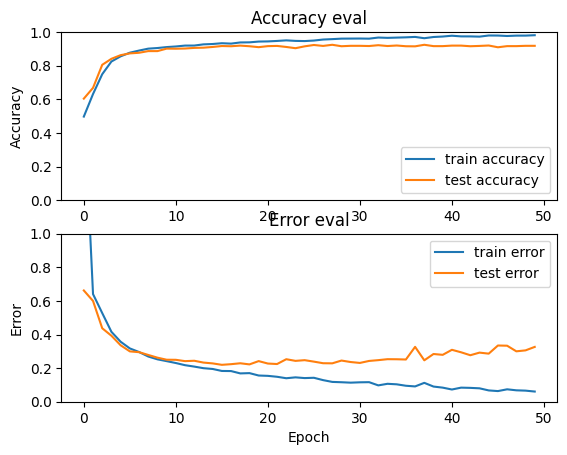

85/85 - 0s - 5ms/step - accuracy: 0.9026 - loss: 0.4029

Test accuracy: 0.9025564789772034


In [ ]:
if __name__ == "__main__":
    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    # input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    #original_model = build_model(input_shape=(130,13))

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    original_model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    original_model.summary()

    # train model
    original_model_history = original_model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

    # plot accuracy/error for training and validation
    plot_history(original_model_history)

    # evaluate model on test set
    original_model_test_loss, original_model_test_acc = original_model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', original_model_test_acc)


In [ ]:
print(f"Test Loss: {original_model_test_loss}")

# Predictions on the test set
original_pred = original_model.predict(X_test)
print(original_pred)

Test Loss: 0.3184179365634918
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
[[0.9939051  0.00609485]
 [0.01345438 0.98654556]
 [0.01044943 0.98955053]
 ...
 [0.992997   0.00700301]
 [0.07146584 0.92853415]
 [0.00650648 0.9934935 ]]


**Statistical Test (T-test and P Value)**

In [ ]:
import scipy.stats as stats

t_stat, p_value = stats.ttest_ind(original_model_history.history["accuracy"], history.history["accuracy"])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.08320523915357454
P-value: 0.9338580672187045


## Test With OWN VOICE

In [ ]:
import librosa
import numpy as np
import math

SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs = np.mean(mfccs.T, axis=0)
    return mfccs

def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.

        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

  # load audio file
    signal, sample_rate = librosa.load(dataset_path, sr=SAMPLE_RATE)

    # process all segments of audio file
    for d in range(num_segments):

        # calculate start and finish sample for current segment
        start = samples_per_segment * d
        finish = start + samples_per_segment

        # extract mfcc
        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
        mfcc = mfcc.T

        # store only mfcc feature with expected number of vectors
        if len(mfcc) == num_mfcc_vectors_per_segment:
            data["mfcc"].append(mfcc.tolist())
            print("{}, segment:{}")
    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


In [ ]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    return X

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import json
# Load model yang sudah dilatih
SAVE_PATH="/content/sample_data/model_TL_LATEST1.keras"
model = load_model(SAVE_PATH)

# Ekstraksi fitur dari file audio
AUDIO_PATH = "/content/drive/MyDrive/dataset/15 Jun 23.28​.wav"
JSON_COBA_PATH = "/content/drive/MyDrive/dataset/coba.json"
features = save_mfcc(AUDIO_PATH, JSON_COBA_PATH, num_segments=10)

# Reshape features untuk cocok dengan input model Anda (misalnya, jika model Anda mengharapkan input berbentuk (1, 13))
# features = features.reshape(1, -1)
features = load_data(JSON_COBA_PATH)

# Prediksi menggunakan model
prediction = model.predict(features)
predicted_class = np.argmax(prediction, axis=1)

# Mapping kelas prediksi ke label
label_mapping = {0: 'Wanita', 1: 'Pria'}
predicted_label = label_mapping[predicted_class[0]]
print("Predicted label:", predicted_label)

{}, segment:{}
{}, segment:{}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Predicted label: Pria
